In [1]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from dateutil.relativedelta import relativedelta


# Part 1

## Load the Data 

In [2]:
#load json into dataframe
df_login = pd.read_json('/Users/2co0kies/Documents/Springboard-CT/ultimate_challenge/logins.json')
df_login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
#create a count column
df_login['login'] = 1

Let's check to see if there are any days missing from the data

In [4]:
#group by month
df_groupby_month = df_login.groupby(df_login.login_time.dt.month)

#check number of days in each onth
for month, login in df_groupby_month:
    number_days = len(df_groupby_month.get_group(month).groupby(df_login.login_time.dt.day))
    print('Month:', month, 'Number of Days:', number_days)

Month: 1 Number of Days: 31
Month: 2 Number of Days: 28
Month: 3 Number of Days: 31
Month: 4 Number of Days: 13


The data simply ends in april, so it does not appear that there any any missing days along the way.

## Plot 15 Minute Intervals

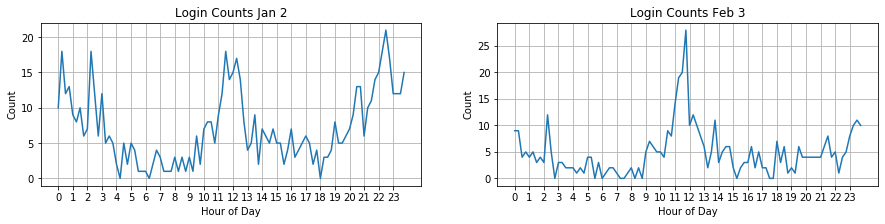

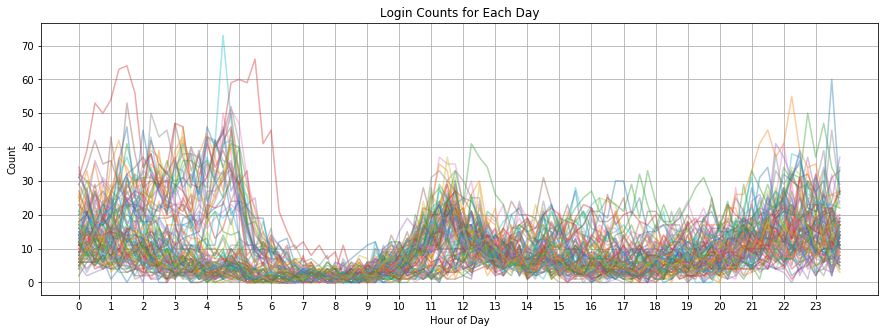

In [5]:
df_groupby_day = df_login.groupby(by=[df_login.login_time.dt.month, df_login.login_time.dt.day])

def login_plot(date, alpha = 1):
    df_temp = df_groupby_day.get_group(date)
    #resample the day into 15 minute intervals, aggregate by count
    df_temp = df_temp.set_index('login_time').resample('15T').count()
    #reset the index
    df_temp = df_temp.reset_index()
    #plot the login counts
    plt.plot(df_temp.login, alpha = alpha)
    plt.xticks(range(0,95,4), labels = range(0,25,1))

plt.figure(figsize=(15,3))

#plot logins every 15 minutes for Jan 2
plt.subplot(1,2,1)
login_plot((1,2))
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.title('Login Counts Jan 2')
plt.grid(b=True)

#plot logins every 15 minutes for Feb 3
plt.subplot(1,2,2)
login_plot((2,3))
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.title('Login Counts Feb 3')
plt.grid(b=True)

plt.show()
    
#plot logins every 15 minutes for every day
plt.figure(figsize=(15,5))
#iterate through each day in data
for day, login in df_groupby_day:
    login_plot(day, alpha=0.4)
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.title('Login Counts for Each Day')
plt.grid(b=True)

plt.show()

These plots give us an idea of how many logins occur at different times of the day. 

Let's see if the number of logins changes for different 15 minute intervals.

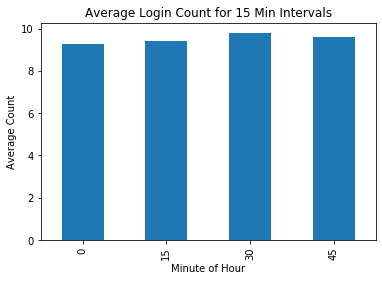

In [6]:
df_15min = df_login.set_index('login_time').resample('15T').count().reset_index()

#plot average login counts for 15 minute intervals
df_15min.groupby(df_15min.login_time.dt.minute).mean().plot(kind='bar', legend=False)
plt.title('Average Login Count for 15 Min Intervals')
plt.xlabel('Minute of Hour')
plt.ylabel('Average Count')
plt.show()

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


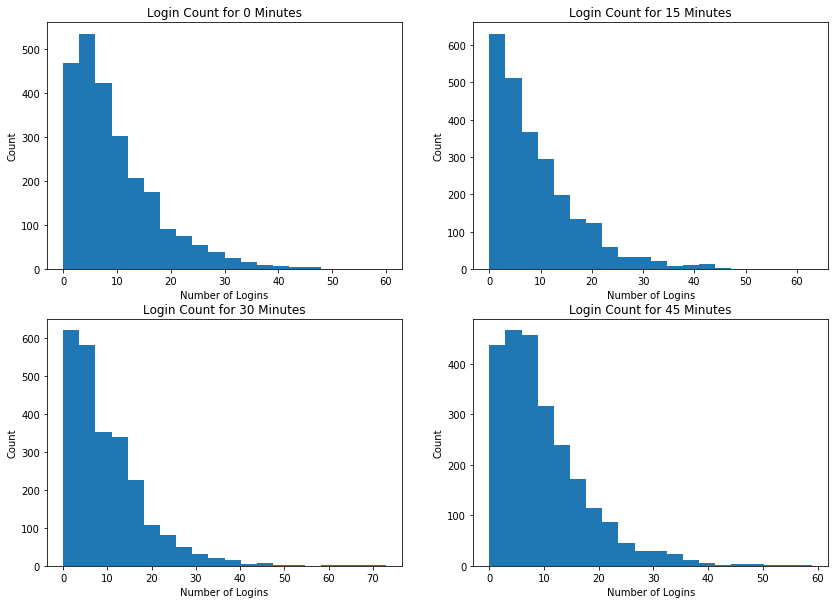

In [7]:
#plot the distribution of login counts for 15 minute intervals
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
c = 0
df_login_by_time = []
for i in range(0,60,15):
    plt.subplot(2,2,c+1)
    x = df_15min.groupby(df_15min.login_time.dt.minute).get_group(i)
    plt.hist(x.login, bins = 20)
    plt.title('Login Count for {} Minutes'.format(i))
    plt.xlabel('Number of Logins')
    plt.ylabel('Count')
    c +=1

plt.show()

In [8]:
from scipy.stats import kruskal

df_15min_group = df_15min.groupby(df_15min.login_time.dt.minute)

#perform kruskal test to see if the distributions 
kruskal(df_15min_group.get_group(0).login, df_15min_group.get_group(15).login,
        df_15min_group.get_group(30).login, df_15min_group.get_group(45).login)

KruskalResult(statistic=7.624169651104029, pvalue=0.05445238708303414)

Using the Kruska-Wallis H Test with an alpha of 0.05, we can see that the groups are not all the same.

## Plot Average Login Count by Hour

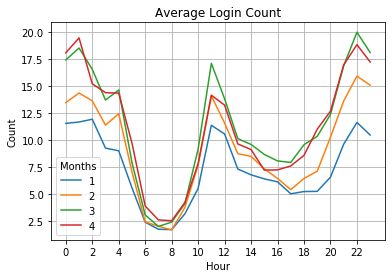

In [9]:
df_hourly = df_login.set_index('login_time').resample('15T').count().reset_index()
df_by_month = df_hourly.groupby(df_hourly.login_time.dt.month)


for i in range(1,5):
    temp = df_by_month.get_group(i).groupby(df_hourly.login_time.dt.hour).mean()
    plt.plot(temp)
plt.title('Average Login Count')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(range(0,24,2))
plt.grid(b=True)
plt.legend(range(1,5), title = 'Months')
plt.show()


We can see that the number of logins crescendos around lunch time (11 am - 12 pm), as well as late night between 8 pm and 4 am.

## Count Logins by Day of the Week

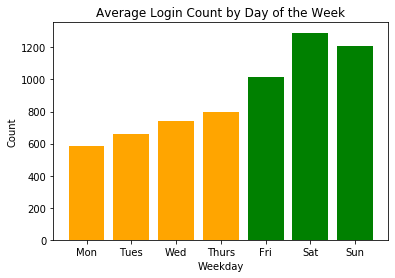

In [10]:
#group logins by day of the week
df_weekday = df_login.set_index('login_time').resample('D').count().reset_index()
df_weekday_mean = df_weekday.groupby(df_weekday.login_time.dt.weekday).mean()
plt.bar(df_weekday_mean.index, df_weekday_mean.login, color=['orange', 'orange', 'orange', 'orange', 'green', 'green', 'green'])
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.xticks(range(0,7,1),labels=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], rotation = None)
plt.title('Average Login Count by Day of the Week')
plt.show()


We can also see that the average number of logins increases on the weekends, with the most occuring on saturdays.

## Conclusion

We can see that the average number of logins increases during the weekends.

The number of logins also increases during lunchtimes (approx 12  pm) and late night (approx 8 pm to 4 am).

# Part 2

1.  A key metric in this experiment would be the number of times a driver partner charges their passenger a toll.  An increase in the number of tolls charged would mean that the driver partners are using the toll bridge more, suggesting that they are taking advantage of the reimbursement program.  Another key metric would be profit.  The ultimate goal of this program would be to increase profits.  The increase in profit will have to exceed the extra costs for toll reimbursements in order for the program to be considered a success


2.  We can begin by recording the number of times a toll is charged for a set period of time.  Then we can record the number of times the toll is charged for a similar period of time after the reimbursement program has begun.  Once we have this information we can use a t-test to see if the averages for the number of tolls charged per day of two time periods are statistically significant (p=0.05).  A t-test can also be used to see if the changes in profit are statistically significant.


3.  If the results are statistically significant, then it would suggest that the reimbursements did in fact encourage driver partners be available in both cities.  One thing to keep watch over is whether or not the driver partners continue to use the toll bridge after some more time has passed.  It is not inconcievable that drivers will use the toll bridge for free more often at the begin of the program to test it out.  After some time has passed drivers may then decide to use it less and less, at which point the number of tolls charged with reimbursement may not be that different from the number of tolls charged without.  If this is the case then some other measures will have to be explored to encourage drivers be available in both cities.  As mentioned earlier, there also needs to be enough of an increase in profit to justify the reimbursement of tolls.  If profits decrease, the experiment should not be considered a success even if the driver partner availability has increased.

# Part 3

## Load The Data

In [11]:
#load the json file
with open('/Users/2co0kies/Documents/Springboard-CT/ultimate_challenge/ultimate_data_challenge.json') as json_file:
    json_data = json.load(json_file)

In [12]:
#normalize json data into a pandas dataframe
data = json_normalize(json_data)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [14]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [15]:
#convert signup_date and last_trip_date to datetime
data.signup_date = pd.to_datetime(data.signup_date)
data.last_trip_date = pd.to_datetime(data.last_trip_date)

In [16]:
#impute the mean ratings for drivers
data['avg_rating_of_driver'].fillna(np.mean(data.avg_rating_of_driver), inplace=True)
data['avg_rating_by_driver'].fillna(np.mean(data.avg_rating_by_driver), inplace=True)

#label the missing phone data as unknown, it's possible the users have other phone brands
data['phone'].fillna('other', inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null datetime64[ns]
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [18]:
#sort data by last_trip_date to see the most recent last_trip_date
data.sort_values('last_trip_date', ascending = False).head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
4486,Winterfell,4,2014-01-25,5.0,1.00,2014-07-01,Android,0.0,True,25.0,11.94,5.0
43047,King's Landing,1,2014-01-15,5.0,1.01,2014-07-01,iPhone,0.8,True,89.3,5.49,4.7
24059,Astapor,1,2014-01-24,4.3,1.11,2014-07-01,iPhone,14.3,False,71.4,8.62,4.9
40290,King's Landing,2,2014-01-07,4.9,1.02,2014-07-01,iPhone,1.6,True,95.2,7.51,4.8
28689,King's Landing,5,2014-01-16,5.0,1.00,2014-07-01,iPhone,0.0,False,75.0,16.32,5.0


In [19]:
#find most recent date (assumption is the most recent date is the date the data was retrieved)
last_date = data.loc[4486, 'last_trip_date']
#find date 30 days before most recent date
last_date_30days = last_date - datetime.timedelta(days=30)

print('Last Date:', last_date)
print('30 Days Prior:', last_date_30days)

Last Date: 2014-07-01 00:00:00
30 Days Prior: 2014-06-01 00:00:00


In [20]:
#if the last_trip_date falls within the date range, label the user as active
data['active'] = data['last_trip_date'].apply(lambda x: True if (x <= last_date) & (x >= last_date_30days) else False)

## Explore The Data

([<matplotlib.axis.XTick at 0x121816a58>,
 <a list of 2 Text xticklabel objects>)

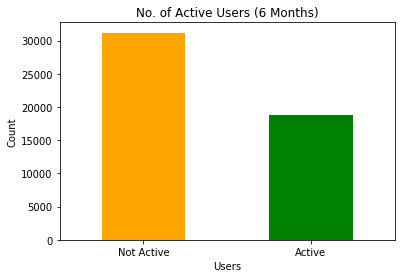

In [21]:
#plot the number of active vs not active users
data.active.value_counts().plot(kind='bar', color = ['orange', 'green'])
plt.title('No. of Active Users (6 Months)')
plt.xlabel('Users')
plt.ylabel('Count')
plt.xticks([False, True], labels = ['Not Active', 'Active'], rotation=False)

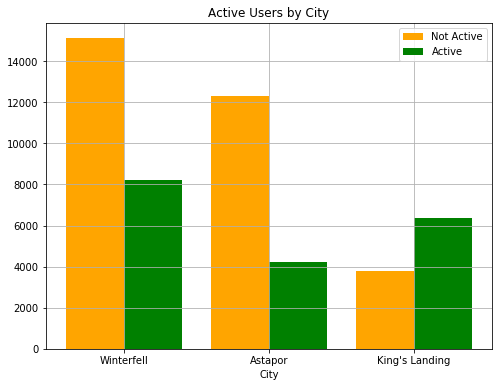

In [22]:
plt.figure(figsize=(8,6))
plt.bar(data[data.active == 0].city.value_counts().index, data[data.active == 0].city.value_counts(), color='orange', align='edge', width=-0.4)
plt.bar(data[data.active == 1].city.value_counts().index, data[data.active == 1].city.value_counts(), color='green', align='edge', width=0.4)
plt.grid(b=True)
plt.title('Active Users by City')
plt.xlabel('City')
plt.legend(['Not Active', 'Active'])
plt.show()

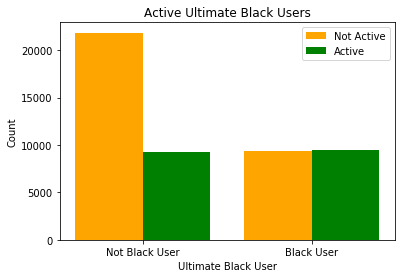

In [23]:
plt.bar(data[data.active == 0].ultimate_black_user.value_counts().index, data[data.active == 0].ultimate_black_user.value_counts(), color='orange', align='edge', width=-0.4)
plt.bar(data[data.active == 1].ultimate_black_user.value_counts().index, data[data.active == 1].ultimate_black_user.value_counts(), color='green', align='edge', width=0.4)
plt.xticks([0,1], labels=['Not Black User', 'Black User'])
plt.xlabel('Ultimate Black User')
plt.ylabel('Count')
plt.title('Active Ultimate Black Users')
plt.legend(['Not Active', 'Active'])
plt.show()

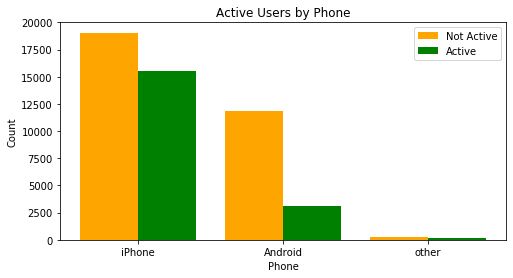

In [24]:
plt.figure(figsize=(8,4))
plt.bar(data[data.active == 0].phone.value_counts().index, data[data.active == 0].phone.value_counts(), color='orange', align='edge', width=-0.4)
plt.bar(data[data.active == 1].phone.value_counts().index, data[data.active == 1].phone.value_counts(), color='green', align='edge', width=0.4)
#plt.xticks([0,1], labels=['Not Black User', 'Black User'])
plt.xlabel('Phone')
plt.ylabel('Count')
plt.title('Active Users by Phone')
plt.legend(['Not Active', 'Active'])
plt.show()

In [25]:
#translate True or False columns to 1 or 0
data.ultimate_black_user = data.ultimate_black_user*1
data.active = data.active*1

In [26]:
#get dummy variables for the city and phone categories
data_encoded = pd.get_dummies(data, columns=['city', 'phone'])

In [27]:
data_encoded.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_other
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,1,0,1,0,0,1,0
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,0,1,0,0,1,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,0,1,0,0,0,1,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,1,0,1,0,0,1,0
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,0,0,0,1,1,0,0


## Models
## Logistic Regression

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = data_encoded[['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'city_Astapor', "city_King's Landing", 'city_Winterfell', 'phone_Android', 'phone_iPhone', 'phone_other']]
y = data_encoded['active']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
logreg_model = LogisticRegression()

In [30]:
logreg_model.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_pred = logreg_model.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' %accuracy_score(y_test, y_pred))

Accuracy: 0.716


In [33]:
pd.DataFrame({'Feature':X.columns, 'Importance':logreg_model.coef_[0]}).sort_values('Importance', ascending=False).reset_index(drop=True)

,Feature,Importance
0,trips_in_first_30_days,0.452903
1,city_King's Landing,0.423928
2,ultimate_black_user,0.415912
3,phone_iPhone,0.251168
4,surge_pct,0.099147
5,weekday_pct,-0.001197
6,phone_other,-0.004350
7,avg_rating_of_driver,-0.029529
8,avg_surge,-0.052391
9,city_Winterfell,-0.058279


## Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_model.predict(X_test)

print('Accuracy: %.3f' %accuracy_score(y_test, y_pred))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.716


In [35]:
pd.DataFrame({'Feature':X.columns, 'Importance':rf_model.feature_importances_}).sort_values('Importance', ascending=False).reset_index(drop=True)

,Feature,Importance
0,avg_dist,0.297428
1,weekday_pct,0.132976
2,avg_rating_by_driver,0.105891
3,surge_pct,0.085764
4,avg_rating_of_driver,0.083335
5,trips_in_first_30_days,0.081907
6,avg_surge,0.068742
7,city_King's Landing,0.043601
8,ultimate_black_user,0.030175
9,phone_Android,0.020115


## Deep Learning

In [36]:
from keras.layers import Dense, Activation
from keras import Sequential, optimizers

Using TensorFlow backend.


In [37]:
dl_model = Sequential()

dl_model.add(Dense(32, activation='relu', input_dim = 14))

dl_model.add(Dense(32, activation='relu'))

dl_model.add(Dense(1, activation='sigmoid'))

In [38]:
dl_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [39]:
dl_model.fit(X_train, y_train, batch_size = 16, epochs = 20)

Epoch 1/20
35000/35000 [==============================] - 4s 115us/step - loss: 0.5262 - accuracy: 0.7455
Epoch 2/20
35000/35000 [==============================] - 3s 98us/step - loss: 0.4963 - accuracy: 0.7651
Epoch 3/20
35000/35000 [==============================] - 3s 99us/step - loss: 0.4884 - accuracy: 0.7697
Epoch 4/20
35000/35000 [==============================] - 4s 103us/step - loss: 0.4832 - accuracy: 0.7747
Epoch 5/20
35000/35000 [==============================] - 4s 101us/step - loss: 0.4805 - accuracy: 0.7759
Epoch 6/20
35000/35000 [==============================] - 3s 100us/step - loss: 0.4778 - accuracy: 0.7775
Epoch 7/20
35000/35000 [==============================] - 3s 99us/step - loss: 0.4764 - accuracy: 0.7789
Epoch 8/20
35000/35000 [==============================] - 4s 101us/step - loss: 0.4748 - accuracy: 0.7787
Epoch 9/20
35000/35000 [==============================] - 3s 100us/step - loss: 0.4734 - accuracy: 0.7797
Epoch 10/20
35000/35000 [========================

In [41]:
y_dl_pred = dl_model.predict(X_test)
y_dl_pred = np.round(y_dl_pred)

print('Accuracy: %.3f'%accuracy_score(y_test, y_dl_pred))

Accuracy: 0.780


## Conclusion

We have a logistic regression, random forest classifier, and a deep learning model.  The deep learning model yields the best results but is more resource heavy.  The logistic regression and random forest classifier show similar results, and are relatively quick and easy to implement.  The logicistic regression models suggests that the number of trips in the first day, black user status, and whether or not the user is from King's Landing are the most important features in predicting an active user.  The random forest classifier selects the average distance, the weekday percentage, and the average rating by driver as the most important features.  The parameters for both models can be further tuned using a grid or random search cv to improve results.